<a href="https://colab.research.google.com/github/Johyeonje/DeepLearningStudy/blob/master/Start!_chap4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#회귀

##선형 회귀
: 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것

###About 경향성 분석

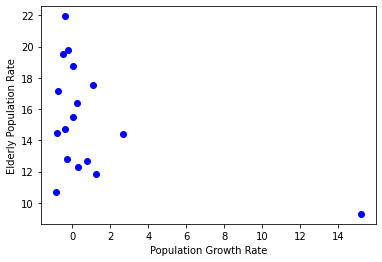

In [ ]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

위 그래프에서 보이는 것처럼 일반적인 경향을 벗어나는 데이터는 제거하는게 좋음.

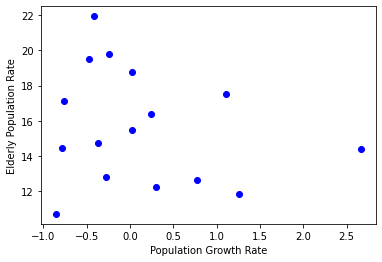

In [ ]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

잔차(residual) : 데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이     
최소 제곱법(Least Square Method) : 잔차의 제곱을 최소화하는 알고리즘     
최소 제곱법으로 직선 y = ax + b 의 a(기울기)와 b(절편)을 구할 수 있다.    
$a = \frac{\sum\limits_{i=1}^n (y_{i}-\bar{y})(x_{i}-\bar{x})}{\sum\limits_{i=1}^n(x_{i}-\bar{x})^2},   b = \bar{y}-a\bar{x}$     
$x_{i}, y_{i}$는 각 데이터 값이고, $\bar{x}, \bar{y}$는 데이터의 평균이다.

a: -0.7225567176686014 b: 15.754907940473604


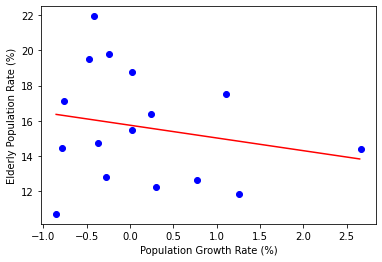

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]
Y = Y[:5] + Y[6:]

#X와 Y의 평균
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(X)

#최소제곱법으로 a,b를 구함
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /=  sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

#그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

#붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x, line_y, '-r')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

하지만 텐서플로를 사용하면 위와 같은 복잡한 수식 없이 회귀선을 구할 수 있다.

99 a: 0.7544854 b: 7.216108 loss: 80.64432
199 a: -0.005767301 b: 11.617953 loss: 26.172523
299 a: -0.4369472 b: 14.105766 loss: 12.119574
399 a: -0.6302159 b: 15.221689 loss: 9.742054
499 a: -0.6984598 b: 15.61576 loss: 9.483385
599 a: -0.7175065 b: 15.725746 loss: 9.465311
699 a: -0.7217147 b: 15.750047 loss: 9.464505
799 a: -0.7224467 b: 15.754273 loss: 9.464482
899 a: -0.72254527 b: 15.754845 loss: 9.464482
999 a: -0.72255397 b: 15.754893 loss: 9.464481


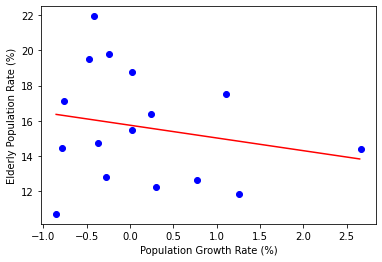

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
X = X[:5] + X[6:]
Y = [12.27,14.44,11.87,18.75,17.52,9.29,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]
Y = Y[:5] + Y[6:]

#a와 b를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화(minimize)
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

#그래프를 드로우
plt.plot(line_x, line_y, '-r')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()


```python
optimizer = tf.optimizers.Adam(lr=0.07)
```

최적화 함수 중 가장 우수한 Adam 을 사용한다.     
보편적으로 학습률을 뜻하는 learning late는 0.1 ~ 0.0001 사이의 값을 사용

```python
for i in range(1000):
  optimizer.minimize(compute_loss, var_list[a,b])
```
1000번의 학습 동안 optimizer.minimize() 함수를 실행     
첫 번째 인수에는 최소화할 손실을 전달, 두 번째 인수에는 학습시킬 변수 리스트 전달

##다항 회귀

다항회귀는 $x^2, x^3$ 과 같은 다항식을 이용한 회귀     
즉, 회귀선이 직선 대신 2차, 3차 함수와 같은 곡선

99 a: 3.5060716 b: -4.2904835 c: 6.253895 loss: 75.96647
199 a: 2.7842405 b: -4.409607 c: 10.321211 loss: 31.87623
299 a: 1.4331466 b: -2.6505966 c: 12.970359 loss: 15.565455
399 a: 0.5751245 b: -1.48592 c: 14.53547 loss: 10.710278
499 a: 0.1428189 b: -0.8992716 c: 15.324837 loss: 9.642103
599 a: -0.042771507 b: -0.64749753 c: 15.663938 loss: 9.467392
699 a: -0.110979445 b: -0.5549702 c: 15.788577 loss: 9.446089
799 a: -0.13245867 b: -0.52583224 c: 15.827825 loss: 9.444157
899 a: -0.13824211 b: -0.5179868 c: 15.838393 loss: 9.444027
999 a: -0.13956697 b: -0.5161896 c: 15.840815 loss: 9.444019


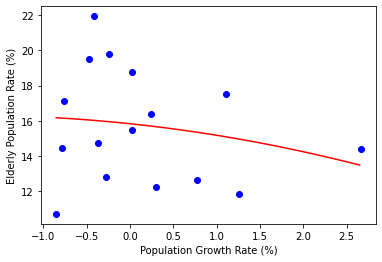

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

#a와 b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X*X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화(minimize)
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c

#그래프를 드로우
plt.plot(line_x, line_y, '-r')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

loss가 소량 감소함은 확인할 수 있음

99 a: -1.3860343 b: 6.1778545 c: -3.1948216 d: 6.44847 loss: 63.555557
199 a: -2.2838633 b: 7.4490194 c: -1.9612336 d: 10.101923 loss: 29.041328
299 a: -1.8470303 b: 5.7816405 c: -1.4727286 d: 12.155386 loss: 19.482267
399 a: -1.0475359 b: 3.4054458 c: -1.3153275 d: 13.535087 loss: 14.0975485
499 a: -0.31874833 b: 1.2957029 c: -1.2324244 d: 14.591691 loss: 10.952322
599 a: 0.24997368 b: -0.3446939 c: -1.1739975 d: 15.3942585 loss: 9.309121
699 a: 0.6616192 b: -1.5313226 c: -1.1324037 d: 15.972409 loss: 8.541628
799 a: 0.9416966 b: -2.3385487 c: -1.1042346 d: 16.365211 loss: 8.220404
899 a: 1.1213049 b: -2.856175 c: -1.0861995 d: 16.61697 loss: 8.09987
999 a: 1.2299356 b: -3.1692402 c: -1.0752977 d: 16.769217 loss: 8.059354
1099 a: 1.2918957 b: -3.3478024 c: -1.069081 d: 16.856047 loss: 8.047175
1199 a: 1.3251979 b: -3.4437766 c: -1.0657394 d: 16.902716 loss: 8.043909
1299 a: 1.3420426 b: -3.4923196 c: -1.0640492 d: 16.926321 loss: 8.04313
1399 a: 1.350044 b: -3.5153794 c: -1.0632466 d:

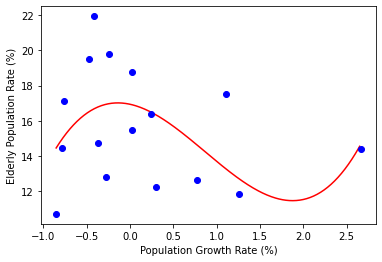

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

#a와 b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X*X*X + b * X*X + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(2000):
  #잔차의 제곱의 평균을 최소화(minimize)
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x*line_x + b * line_x*line_x + c *line_x + d

#그래프를 드로우
plt.plot(line_x, line_y, '-r')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

손실도가 2차 함수에 비해서 커졌다(?) 안커졌음     
log나 분수, 지수 등을 활용해서 더 나은 비선형 회귀를 시도해 봐야함     
     
이런 시도를 하지 않고 새로운 방법이 바로 딥러닝 네트워크를 이용한 회귀

##딥러닝 네트워크를 이용한 회귀

In [ ]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, 0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

model = tf.keras.Sequential([tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
                             tf.keras.layers.Dense(units=1)])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


###*Parameter 갯수 계산법



`(입력측 뉴런의 수 + 1) * (출력측 뉴런의 수)`      
여기서 입력측 뉴런의 수에 더해지는 1은 bias


In [ ]:
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 255.1632
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 113.9011
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 11.1236
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 10.2235
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 10.0109
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.8601
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7837
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7523
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7336
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7184


위 학습 진행에서 epoch가 9회에서 10회로 넘어감에 따라 loss가 거의 바뀌지 않는 것을 알 수 있다.    
epoch가 높아질 수록 경향성은 지나칠 정도로 잘 반영하지만 새로운 데이터에 대한 유연성이 떨어진다

In [ ]:
model.predict(X)

array([[15.878726 ],
       [15.715998 ],
       [15.59298  ],
       [15.868536 ],
       [15.683985 ],
       [15.8788185],
       [15.834892 ],
       [15.791591 ],
       [15.817761 ],
       [15.8118925],
       [15.696547 ],
       [15.804031 ],
       [15.829944 ],
       [15.867672 ],
       [15.721404 ],
       [13.573581 ]], dtype=float32)

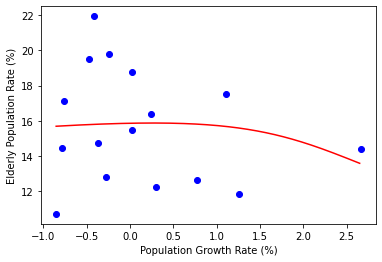

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

##보스턴 주택 가격 데이터세트

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


훈련데이터와 테스트 데이터의 비율은 보통 80 : 20으로 한다.    
이때 훈련데이터의 일부를 검증 데이터로 사용하는데    
결과적으로 `훈련데이터 : 검증데이터 : 테스트데이터 = 60 : 20 : 20`

데이터의 단위를 보면 항목마다 다양하다.    
이는 학습시에 일정하게 가중치에 영향을 미치는데 방해가 되는 요소이다.    
때문에 이러한 데이터들의 **정규화**를 통해 전처리를 한 후에 학습을 해야 효율이 좋다.

`데이터 정규화 : (데이터 - 데이터 평균값) / 데이터 표준편차`    
이때 정규화는 훈련 데이터를 기준으로 함    
이유 : 테스트 데이터는 어떤 평균과 표준편차를 띌지 모르기 때문에 테스트 데이터가 없다고 생각하고 진행

In [ ]:
x_mean = train_X.mean(axis=0)
x_std =train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
      tf.keras.layers.Dense(units=52, activation='relu'),
      tf.keras.layers.Dense(units=52, activation='relu'),
      tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_25 (Dense)             (None, 52)                2756      
_________________________________________________________________
dense_26 (Dense)             (None, 52)                2756      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 53        
Total params: 6,293
Trainable params: 6,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 12ms/step - loss: 8.2607 - val_loss: 1.1303
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6986 - val_loss: 0.9921
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5263 - val_loss: 0.7516
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4388 - val_loss: 0.6462
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3081 - val_loss: 0.4267
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2851 - val_loss: 0.4945
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2546 - val_loss: 0.4489
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2420 - val_loss: 0.3962
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2361 - val_loss: 0.4156
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2085 - val_loss: 0.2897
Epoch 11/25
10/10 

validation_split : 훈련 데이터의 일부를 검증 데이터로 사용하여 학습결과 검증    
         사용 시 검증 데이터의 로스(val_loss)도 같이 출력됨

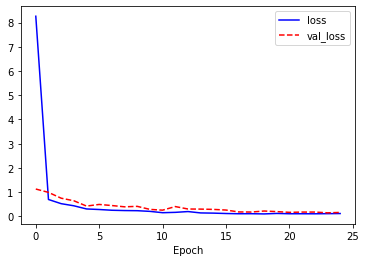

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2602


0.26018157601356506

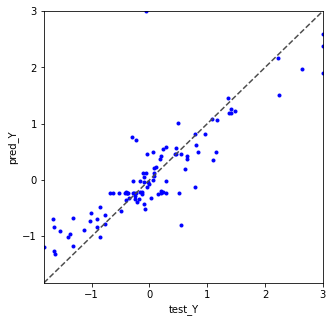

In [ ]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

callback : 학습의 중간에 끼어들기 위한 함수, epoch 끝마다 호출됨

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 6.0391 - val_loss: 1.2096
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5940 - val_loss: 0.7924
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5059 - val_loss: 0.4719
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2775 - val_loss: 0.2872
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2498 - val_loss: 0.3966
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2392 - val_loss: 0.2507
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2464 - val_loss: 0.2037
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1837 - val_loss: 0.2462
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1441 - val_loss: 0.2035
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1500 - val_loss: 0.1794
Epoch 11/25
10/10 

* 위 실행결과에서 15 Epoch에서 부터 더이상 loss가 감소하지 않아 중지된걸 확인할 수 있음.

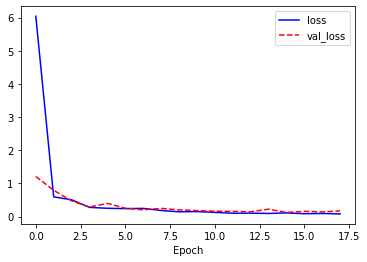

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.3033


0.30330485105514526

그래프로는 Loss의 뚜렷한 효과가 보이지 않지만 평가 결과는 더 낮은 Loss를 보이기 때문에 네트워크의 주목적인 손실의 감소를 더 잘 보여주는 잘 학습된 모델이라고 할 수 있다.

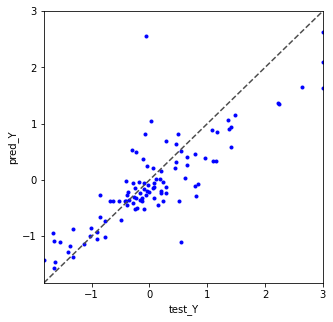

In [ ]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()